# Extraer Histogramas de eventos unicos (center vtx, random dir)

In [2]:
import uproot
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sn

# 1 - Extraer datos

In [3]:
file = uproot.open("/snoplus simulations/electron bulk/center point/random direction/High Statistic/simu_Analysis_elec_5MeV.root")
file.keys()

['T;64', 'T;63', 'pmt;2', 'pmt;1']

In [4]:
data1 = file['T;64']
pmt_info = file['pmt;1']

## 1.1 - EV info

In [5]:
#evtid = np.array(data1['evtid'], dtype = np.int16)
mcID = np.array(data1['mcID'], dtype = np.int16)
#mc_position = np.array(data1['mc_position'])   #-> Position Generation
mc_momentum = np.array(data1['mc_momentum'])   #-> IMPORTANT: Direction of simulated event
position = np.array(data1['position'])        
hit_pmtid = np.array(data1['hit_pmtid'], dtype = np.int16)
time_residual = np.array(data1['hit_residual'])
hit_type = np.array(data1['hit_type'], dtype = np.int16)

## 1.2 - PMT info

In [6]:
pmt_id = np.array(pmt_info['pmt_id'], dtype = np.int16)
pmt_pos_xyz = np.array(pmt_info['pmt_pos_xyz'])
pmt_pos_sph = np.array(pmt_info['pmt_pos_sph'])
pmt_type = np.array(pmt_info['pmt_type'], dtype = np.int16)

## 1.3 - Extract Valid PMT info index

- Index

In [9]:
valid_pmt_id = np.array(np.where(pmt_type == 1)[0])   # PMT valid ID match with index of where pmt_type=1

valid_id_info_ev_i = np.array(np.where(np.in1d(hit_pmtid, valid_pmt_id))[0])
valid_id_info_ev_i

array([        0,         1,         2, ..., 139457001, 139457002,
       139457003], dtype=int64)

- PMT valid ID

In [21]:
condition = (pmt_type == 1)
pmt_valid_id = np.extract(condition, pmt_id)
pmt_valid_id

array([   1,    2,    3, ..., 9693, 9694, 9695], dtype=int16)

## 1.3 - Encontrar Segmentación de eventos

In [7]:
#Separar mcIDs:
break_i = [0] #List of indices where data change of event ID
N_data = len(mcID)
for i in range(N_data-1):
    if mcID[i] != mcID[i+1]:
        break_i.append(i+1)
break_i = np.array(break_i, dtype = np.int32)

In [8]:
break_i

array([        0,      1322,      2750, ..., 139452754, 139454117,
       139455577])

## 1.4 - Extraer información valida de un evento

In [28]:
#Choose an evID
ev_id = 0

ev_i = break_i[ev_id]
ev_f = break_i[ev_id + 1]

#Observable
time_res_ev = time_residual[ev_i:ev_f]

#extract valid observable data (PMT Type = 1)
pmt_id_ev = hit_pmtid[ev_i:ev_f]

valid_info_i = np.where(np.in1d(pmt_id_ev, pmt_valid_id))[0]

#filtered observable
time_res_ev = time_res_ev[valid_info_i]

In [29]:
time_res_ev

array([-68.63178824,   3.43324894,   2.55684093, ..., 201.54200236,
       222.30404705, 224.15601823])

# 2 - Graficar los Observables

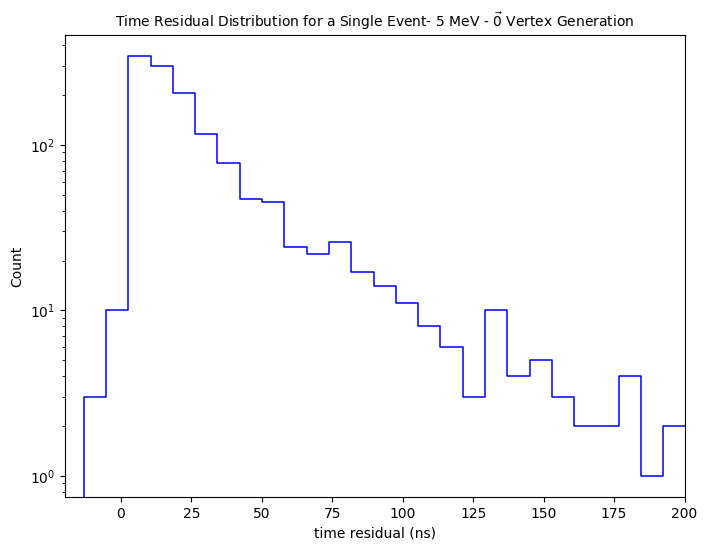

In [73]:
sn.reset_orig()
# Crear el histograma utilizando seaborn

plt.figure(figsize=(8,6))

sn.histplot(time_res_ev, binwidth = 8, element = 'step', alpha = 0, color = 'blue', linewidth = 1.1)

plt.title(r'Time Residual Distribution for a Single Event- 5 MeV - $\vec{0}$ Vertex Generation', fontsize = 10)
plt.xlabel('time residual (ns)')

plt.xlim(-20, 200)
plt.yscale('log')
plt.savefig('figs/time residual single event - 5 MeV - center vtx.png', format = 'png', bbox_inches = 'tight')
plt.show()